In [26]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df = pd.read_csv("Zoo.csv")
df = df.drop("animal name", axis=1)
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


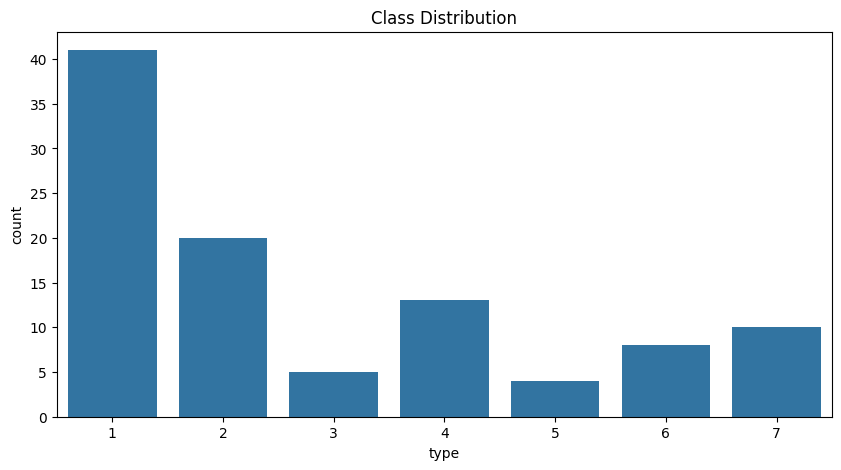

In [4]:
# Class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=df)
plt.title("Class Distribution")
plt.show()

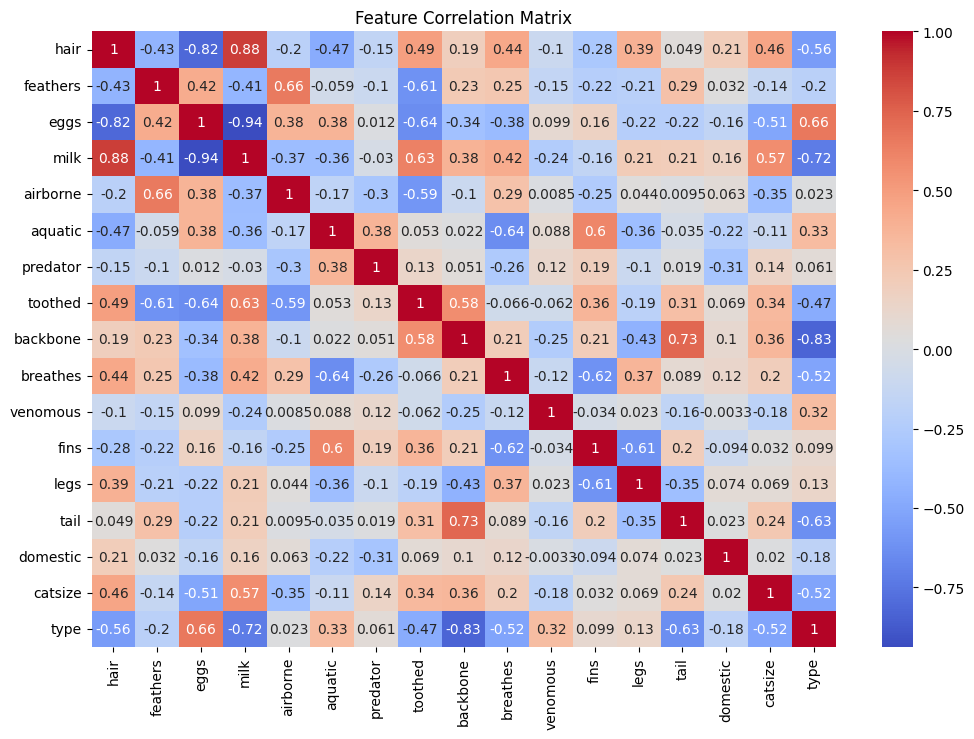

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [6]:
# Check missing values
print("Missing values:\n", df.isnull().sum())  # No Missing Values

Missing values:
 hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64


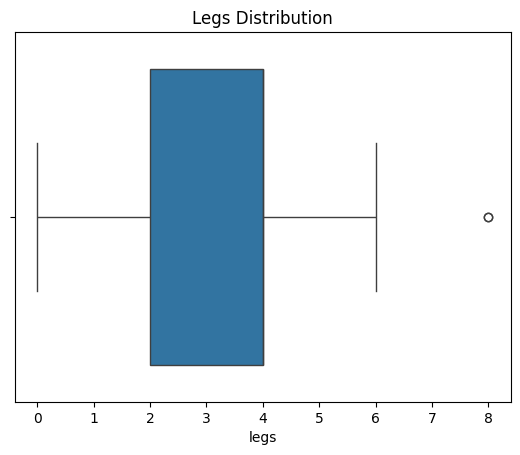

In [7]:
# Check outliers in 'legs'
sns.boxplot(x=df['legs'])
plt.title("Legs Distribution")
plt.show()

In [8]:
# Remove duplicate entry (e.g., duplicate "frog")
df = df.drop_duplicates()

In [9]:
# Example: Check rows with outlier in 'legs'
Q1 = df['legs'].quantile(0.25)
Q3 = df['legs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['legs'] < lower_bound) | (df['legs'] > upper_bound)]
print("Outliers in 'legs':\n", outliers)

Outliers in 'legs':
     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
53     0         0     1     0         0        1         1        0   
72     0         0     0     0         0        0         1        0   

    backbone  breathes  venomous  fins  legs  tail  domestic  catsize  type  
53         0         0         0     0     8     0         0        1     7  
72         0         1         1     0     8     1         0        0     7  


In [10]:
df.loc[df.index == 72, 'legs'] = 0  # Correct "seasnake" legs to 0

In [12]:
X = df.drop('type', axis=1)
y = df['type']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Initialize KNN with K=5 (default)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [20]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3}


In [21]:
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.92        12
   macro avg       0.93      0.86      0.81        12
weighted avg       0.96      0.92      0.89        12



In [23]:
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [24]:
# Train KNN on reduced data
knn_pca = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
knn_pca.fit(X_pca, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [27]:
# Create meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


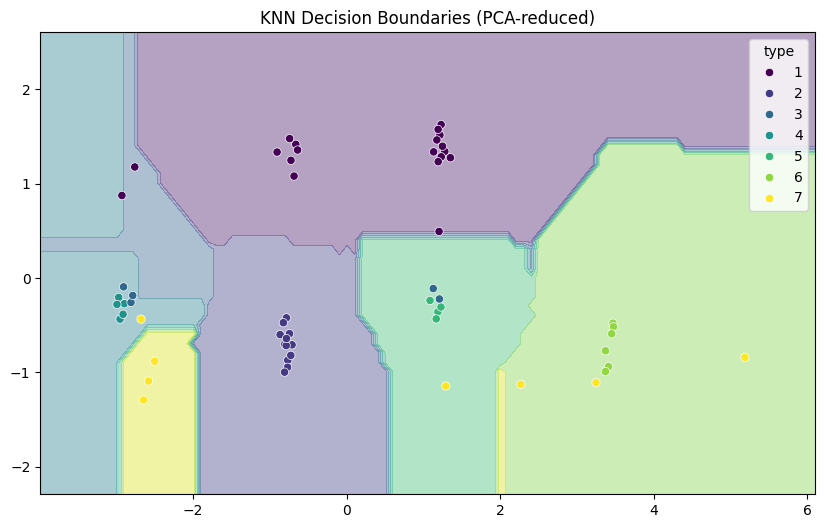

In [28]:
# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title("KNN Decision Boundaries (PCA-reduced)")
plt.show()

1. What are the key hyperparameters in KNN?

In [ ]:
# K: Number of neighbors to consider.

# Distance Metric: Determines how similarity is calculated (e.g., Euclidean, Manhattan).

# Weights: Whether to use uniform weights or weight by distance.

 What distance metrics can be used in KNN?

In [ ]:
# Euclidean: Standard straight-line distance.

# Manhattan: Sum of absolute differences (works well with binary data).

# Minkowski: Generalized form (Euclidean when p=2, Manhattan when p=1).

# Hamming: For categorical data (counts mismatched features).